In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [28]:
#loading datasets- we have two data sets of interest namely, store and train 
store=pd.read_csv('store.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

C:\Users\Pranay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
store.isnull().sum()
#we notice  considerable amount of missing values which needs to be dealt with 

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [29]:
#Imputing missing competition distance with the mean of the column
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)

In [30]:
#replace rows with competiton since week/month and promo 2 since/week month which are  null to zero
store.fillna(0, inplace = True) 

In [31]:
#removing the days from train where the sales is 0 and the retal is closed otherwise it will induce bias in prediction
#reason: we are concerned about the 6 weeks ahead sales and stores which have no sales/customers on the present day cannot be
         #included in our training data as the predictions might be deviated from the reality
train=train[train.Sales!=0]
train=train[train.Open==1]

#fields present in train.csv and store.csv

# 1.train.csv-
#Store-integer unique ID for each store
#Dayofweek-integer stating the day of the week
#Date- object stating the date of the month 
#Sales-integer denoting the sales on that perticular day which is also the target variable
#Customers-integer showing the number of customers on that day
#Open-categorical with 1=store open and 0=store closed
#Promo-categorical 1 and 0 which denotes whether the store is running a promo on that day
#State Holiday- categorical with a=public holiday, b=easter holiday, c-christmas and 0=none
#school holiday- categorical and indicates if store, date was affected by closure of schools

# 2.store.csv-
#store- integer unique ID for each store
#storetype-categorical with 4 different store models: a,b,c,d
#assortment-categorical describes an assortment level: a=basic,b=extra,c=extra
#competition distnce- float denoting distance of competiton to nearest store
#competitionopensincemonth-float giving the approximate time the competition was open 
#promo2-categorical with 0=store not participating in promotion and 1=participating 
#promo2sinceweek-float giving the calender week promo2 started participating in promotion
#promo2sinceyear-float giving the  calender year promo2 started participating in promotion
#promointerval- consecutive intervals promo2 is started. eg feb,may,aug,nov-means promo start in feb,may,august,nov at 
                #any time of year

#Volume- The Store Data Frame has 1115 entries while the Train Data Frame has close to 1 million entries 
#Variety- The two Data Frames contain a variety of fields which are crucial to the predictive 
          #model such as store type, competition distance, state holidays, store open/ closed etc. 
          #The dataset has values which are categorical and continuous. 
#Velocity-The sales entries is between a span of March 2013 to July 2015, 
          #so there is scope of showing how the customer sales and number of  customers coming is evolving with time.
#Veracity- Columns such as Competition open since month/year,
          #promo2 since week/year has close to 500 missing values which have to be dealt with. 
          #Also, stores which are closed and have zero sales might lead to potential bias in prediction.

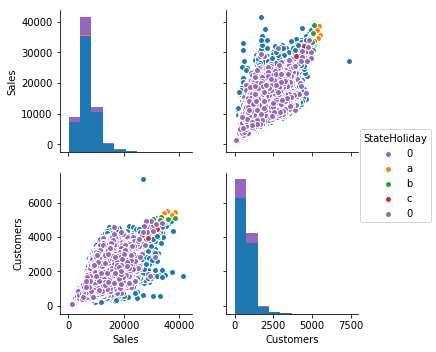

In [9]:
#pairplot for train data
sns.pairplot(train,vars=["Sales","Customers"],hue="StateHoliday")
#some outliers noticed but our observtion proposes a hypothesis that having  state holiday leads to higher sales as more 
     #customers show up

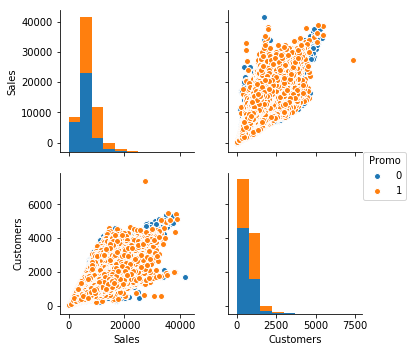

In [12]:
sns.pairplot(train,vars=["Sales","Customers"],hue="Promo")
plt.savefig("figure.png")
#The sales and number of Customers are found to be similar based on whether there is 
#promo or not but as we can see, there are potential outliers in our plot which gives a slightly 
#biased peak value in the histograms.

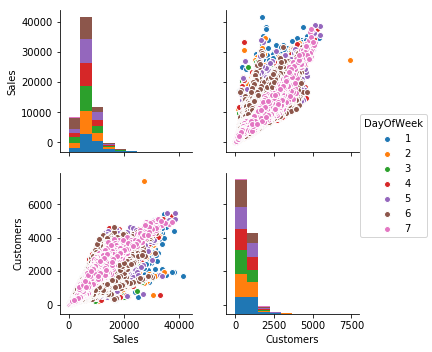

In [13]:
sns.pairplot(train,vars=["Sales","Customers"],hue="DayOfWeek")
plt.savefig("figure.png")
#We can notice slightly higher Sales and Customers during the end of the week but even this plot has 
#some outliers which shows some deviating Sales/Customer patterns on Mondays and Tuesdays.

In [6]:
#join train and store
df_train=pd.merge(train,store,how='inner',on=['Store'])

# Preliminary Data Analysis
# Author: Pranay Mohanty 

In [7]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import concat
from pandas import Series
from math import sqrt 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [32]:
df_train["Date"] = pd.to_datetime(df_train["Date"] )
df_train=df_train.sort_values(by=['Date'])

In [33]:
column = df_train.ix[:,2]

feature_col=pd.DataFrame({"year": column.dt.year,
              "month": column.dt.month,
              "day": column.dt.day,
              "dayofyear": column.dt.dayofyear,
              "week": column.dt.week,
              "weekofyear": column.dt.weekofyear,
              "weekday": column.dt.weekday,
              "quarter": column.dt.quarter,
             })

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [34]:
df_concat = pd.concat([df_train,feature_col], axis=1)

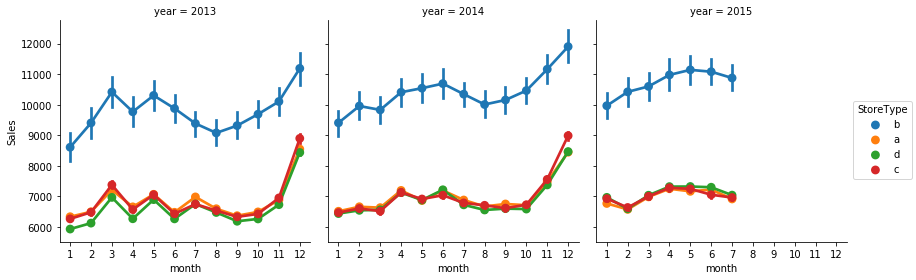

In [19]:
df_2013=df_concat[df_concat['year']==2013]
df_2014=df_concat[df_concat['year']==2014]
df_2015=df_concat[df_concat['year']==2015]
sns.factorplot(x="month", y="Sales", hue="StoreType",col="year", data=df_concat)

In [20]:
df_concat.PromoInterval.value_counts()

0                   423292
Jan,Apr,Jul,Oct     242397
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64

In [22]:
df_concat.StateHoliday.value_counts()

0    731308
0    112120
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [35]:
df_concat['p_1'] = df_concat.PromoInterval.apply(lambda x: x[:3] if type(x) == str else 0)
df_concat['p_2'] = df_concat.PromoInterval.apply(lambda x: x[4:7] if type(x) == str else 0)
df_concat['p_3'] = df_concat.PromoInterval.apply(lambda x: x[8:11] if type(x) == str else 0)
df_concat['p_4'] = df_concat.PromoInterval.apply(lambda x: x[12:15] if type(x) == str else 0)

In [36]:
df_concat = pd.get_dummies(df_concat, columns = ['p_1', 'p_2', 'p_3', 'p_4', 
                                       'StateHoliday' , 
                                       'StoreType', 
                                       'Assortment'])

In [37]:
df_concat.drop(['Store',
          'PromoInterval', 
          'p_1_0', 'p_2_0', 'p_3_0', 'p_4_0',
           'StateHoliday_0', 
           'year','Date'], axis=1,inplace=True)

In [38]:
df_a_pre=df_train[df_train['StoreType']=='a']
df_b_pre=df_train[df_train['StoreType']=='b']
df_c_pre=df_train[df_train['StoreType']=='c']
df_d_pre=df_train[df_train['StoreType']=='d']

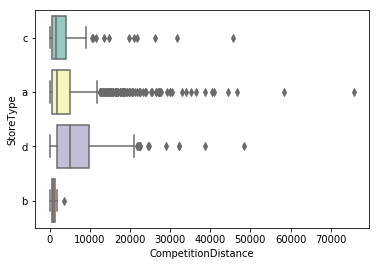

In [48]:
sns.boxplot(x="CompetitionDistance", y="StoreType",data=store, palette="Set3")

Store Type a 

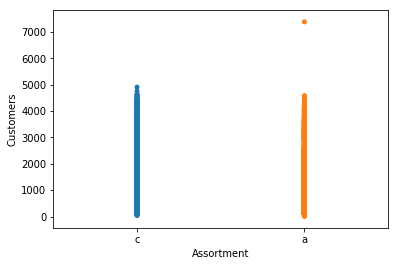

In [37]:
sns.stripplot(x="Assortment", y="Customers", data=df_a_pre)

Store Type b 

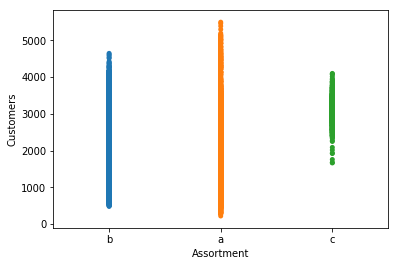

In [38]:
sns.stripplot(x="Assortment", y="Customers", data=df_b_pre)

Store Type c 

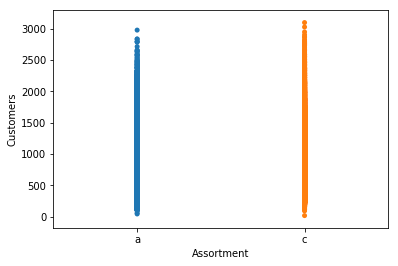

In [39]:
sns.stripplot(x="Assortment", y="Customers", data=df_c_pre)

Store Type d

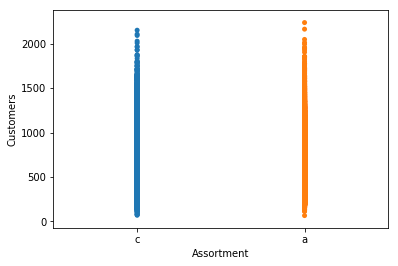

In [40]:
sns.stripplot(x="Assortment", y="Customers", data=df_d_pre)

Overall

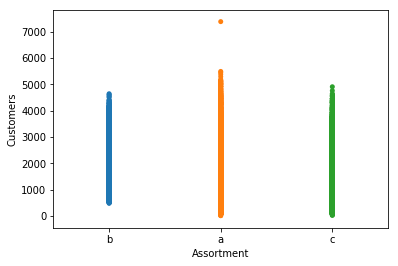

In [41]:
sns.stripplot(x="Assortment", y="Customers", data=df_train);

4 pair plots- one for each store type to show how customers and sales is segmented by day of the week

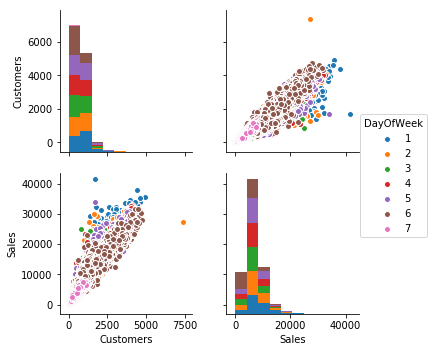

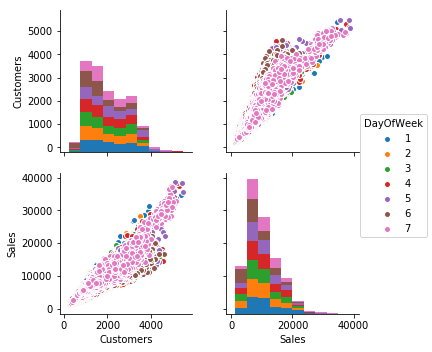

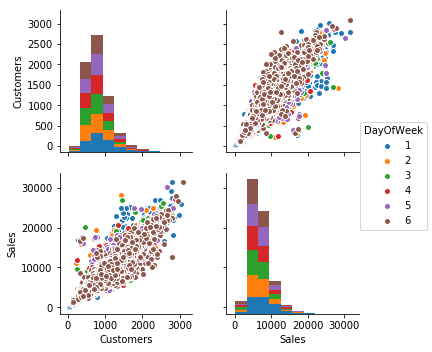

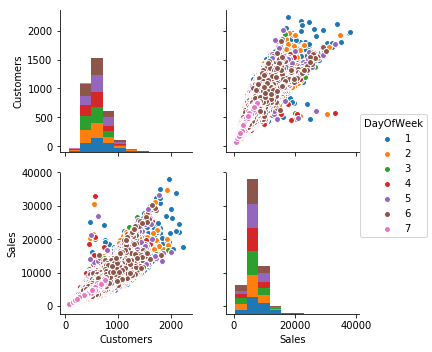

In [42]:
#Store a 
sns.pairplot(df_a_pre,vars=["Customers","Sales"],hue="DayOfWeek")
#Store b
sns.pairplot(df_b_pre,vars=["Customers","Sales"],hue="DayOfWeek")
#Store c
sns.pairplot(df_c_pre,vars=["Customers","Sales"],hue="DayOfWeek")
#Store d 
sns.pairplot(df_d_pre,vars=["Customers","Sales"],hue="DayOfWeek")

In [51]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
reg=linear_model.LinearRegression()
X_2 = df_concat.drop(['Sales'], axis = 1)
y_2= df_concat.Sales
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=101)
reg.fit(X_train,y_train)
predictions =reg.predict(X_test)

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 940.5759633023512
MSE: 1670907.1921206957
RMSE: 1292.6357538458758


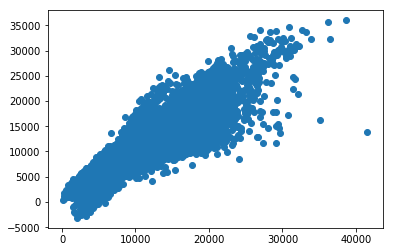

In [47]:
plt.scatter(y_test,predictions)

# Final
# Author: Pranay Mohanty

Ridge

In [52]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
X_2 = df_concat.drop(['Sales'], axis = 1)
y_2= df_concat.Sales
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=101)

alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 40)

Text(0,0.5,'weights')

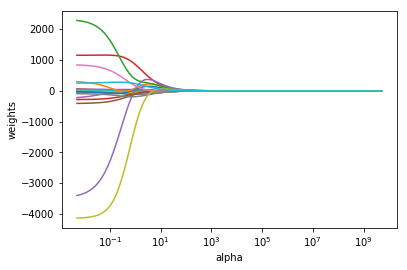

In [50]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [143]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [148]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [149]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge4.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, ridge4.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge4.predict(X_test))))

MAE: 943.1414242245992
MSE: 1675375.32870788
RMSE: 1294.3629045626578


Lasso

Text(0,0.5,'weights')

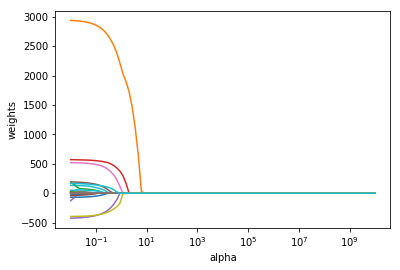

In [55]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [141]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))

MAE: 942.6325628871319
MSE: 1674877.840800994
RMSE: 1294.1707154780602


Random Forest Regressor

In [174]:
X_2 = df_concat.drop(['Sales'], axis = 1)
y_2= df_concat.Sales
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=101)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1, n_estimators = 25)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [175]:
predictions_2 =rf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))

MAE: 348.4572032593504
MSE: 267613.1854758614
RMSE: 517.3134305968301


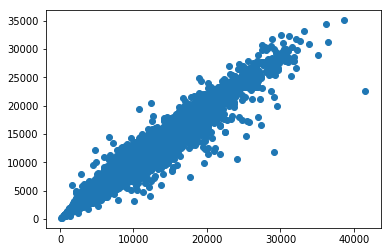

In [63]:
plt.scatter(y_test,predictions_2)

Fairly strong relation between my actual and predicted values which means the model has faired well. 

In [15]:
df_a=df_concat[df_concat['StoreType_a']==1]
df_b=df_concat[df_concat['StoreType_b']==1]
df_c=df_concat[df_concat['StoreType_c']==1]
df_d=df_concat[df_concat['StoreType_d']==1]

In [16]:
X_a = df_a.drop(['Sales'], axis = 1)
y_a= df_a.Sales
X_atrain, X_atest, y_atrain, y_atest = train_test_split(X_a, y_a, test_size=0.2, random_state=101)
X_b = df_b.drop(['Sales'], axis = 1)
y_b= df_b.Sales
X_btrain, X_btest, y_btrain, y_btest = train_test_split(X_b, y_b, test_size=0.2, random_state=101)
X_c = df_c.drop(['Sales'], axis = 1)
y_c= df_c.Sales
X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(X_c, y_c, test_size=0.2, random_state=101)
X_d = df_d.drop(['Sales'], axis = 1)
y_d= df_d.Sales
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(X_d, y_d, test_size=0.2, random_state=101)

Store Type 'a'

In [62]:
predictions =reg.predict(X_atest)
print('MAE:', metrics.mean_absolute_error(y_atest, predictions))
print('MSE:', metrics.mean_squared_error(y_atest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_atest, predictions)))

MAE: 917.7613942448606
MSE: 1553766.2771098004
RMSE: 1246.501615365901


Store Type 'b'

In [63]:
predictions =reg.predict(X_btest)
print('MAE:', metrics.mean_absolute_error(y_btest, predictions))
print('MSE:', metrics.mean_squared_error(y_btest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_btest, predictions)))

MAE: 2263.333084682163
MSE: 7915659.796692677
RMSE: 2813.4782381764885


Store Type 'c'

In [64]:
predictions =reg.predict(X_ctest)
print('MAE:', metrics.mean_absolute_error(y_ctest, predictions))
print('MSE:', metrics.mean_squared_error(y_ctest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_ctest, predictions)))

MAE: 821.3364404943412
MSE: 1247320.7091568883
RMSE: 1116.8351306960612


Store Type 'd'

In [65]:
predictions =reg.predict(X_dtest)
print('MAE:', metrics.mean_absolute_error(y_dtest, predictions))
print('MSE:', metrics.mean_squared_error(y_dtest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_dtest, predictions)))

MAE: 959.1469653755393
MSE: 1739072.4430505508
RMSE: 1318.7389594042297


Store Type 'a'

In [70]:
predictions_2 =rf.predict(X_atest)
print('MAE:', metrics.mean_absolute_error(y_atest, predictions_2))
print('MSE:', metrics.mean_squared_error(y_atest, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_atest, predictions_2)))

MAE: 175.47764081582048
MSE: 92002.55904559267
RMSE: 303.3192361944634


Store Type 'b'

In [71]:
predictions_2 =rf.predict(X_btest)
print('MAE:', metrics.mean_absolute_error(y_btest, predictions_2))
print('MSE:', metrics.mean_squared_error(y_btest, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_btest, predictions_2)))

MAE: 254.34442159383033
MSE: 168442.46270128532
RMSE: 410.4174249484119


Store Type 'c'

In [72]:
predictions_2 =rf.predict(X_ctest)
print('MAE:', metrics.mean_absolute_error(y_ctest, predictions_2))
print('MSE:', metrics.mean_squared_error(y_ctest, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_ctest, predictions_2)))

MAE: 176.15629282110294
MSE: 91601.84511895193
RMSE: 302.6579672153897


Store Type 'd'

In [74]:
predictions_2 =rf.predict(X_dtest)
print('MAE:', metrics.mean_absolute_error(y_dtest, predictions_2))
print('MSE:', metrics.mean_squared_error(y_dtest, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_dtest, predictions_2)))

MAE: 173.84526104262474
MSE: 80985.48444660509
RMSE: 284.57948704466577


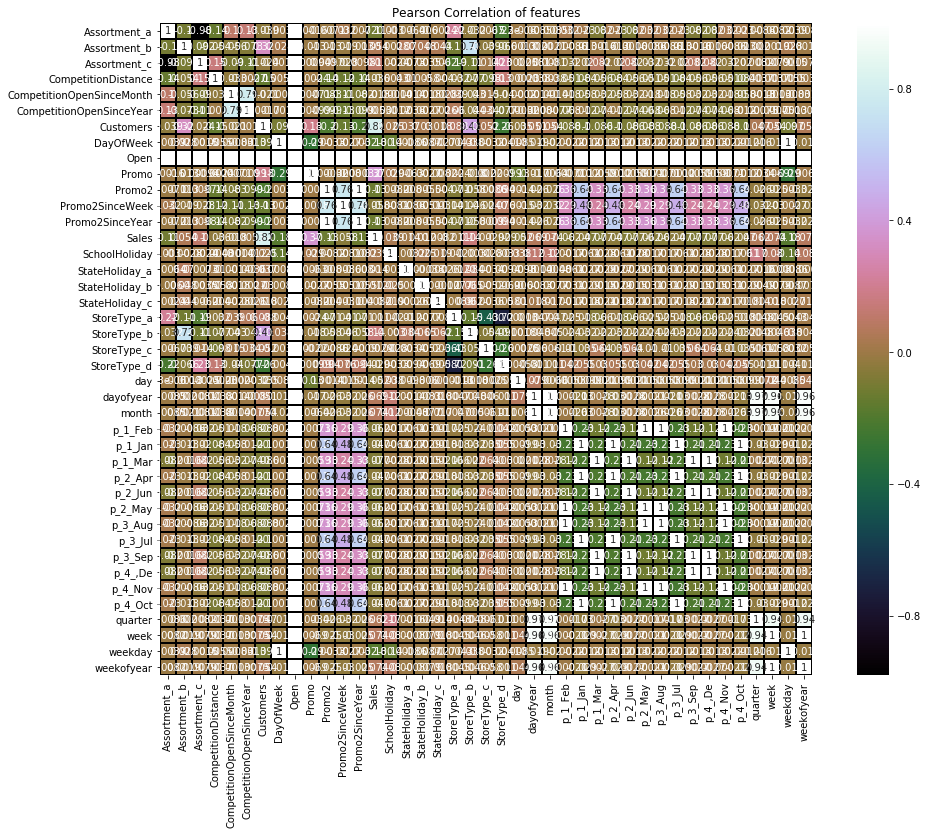

In [75]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_concat.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_concat.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = df_concat[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=1,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [17]:
X_a = df_a.drop(['Sales'], axis = 1)
y_a= df_a.Sales
X_atrain, X_atest, y_atrain, y_atest = train_test_split(X_a, y_a, test_size=0.2, random_state=101)
X_b = df_b.drop(['Sales'], axis = 1)
y_b= df_b.Sales
X_btrain, X_btest, y_btrain, y_btest = train_test_split(X_b, y_b, test_size=0.2, random_state=101)
X_c = df_c.drop(['Sales'], axis = 1)
y_c= df_c.Sales
X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(X_c, y_c, test_size=0.2, random_state=101)
X_d = df_d.drop(['Sales'], axis = 1)
y_d= df_d.Sales
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(X_d, y_d, test_size=0.2, random_state=101)

Store Type a 

In [185]:
rf_a = RandomForestRegressor(n_jobs = -1, n_estimators = 25)
rf_a.fit(X_atrain, y_atrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [207]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(X_atrain.columns, rf_a.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                             score
Customers                  0.833408
CompetitionDistance        0.0573922
Promo                      0.0294332
CompetitionOpenSinceYear   0.0137632
Promo2SinceWeek            0.0121508
CompetitionOpenSinceMonth  0.0108877
Promo2SinceYear            0.00609412
day                        0.00587751
dayofyear                  0.00538227
DayOfWeek                  0.00466056
weekday                    0.00451483
Assortment_c               0.00254907
Assortment_a               0.00232789
week                       0.00182745
weekofyear                 0.00176904
month                      0.000919534
p_4_Oct                    0.00081147
SchoolHoliday              0.000725579
p_1_Jan                    0.000723494
p_3_Jul                    0.000650621
p_2_Apr                    0.000643204
p_2_May                    0.000458776
p_3_Aug                    0.000456417
p_1_Feb                    0.000455547
Promo2                     0.000451613
p_4_Nov  

store type b 

In [187]:
rf_b = RandomForestRegressor(n_jobs = -1, n_estimators = 25)
rf_b.fit(X_btrain, y_btrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [208]:
headers = ["name", "score"]
values = sorted(zip(X_btrain.columns, rf_b.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                             score
Customers                  0.76947
Assortment_b               0.15045
CompetitionOpenSinceMonth  0.0278757
CompetitionDistance        0.00924342
Promo                      0.00701807
weekday                    0.00478623
DayOfWeek                  0.00474834
dayofyear                  0.00460343
Assortment_a               0.00453225
day                        0.00443958
StateHoliday_a             0.00258464
weekofyear                 0.00193053
CompetitionOpenSinceYear   0.00192224
week                       0.00189594
month                      0.000952838
StateHoliday_b             0.000877591
SchoolHoliday              0.000507246
Promo2SinceWeek            0.000413713
quarter                    0.000289086
Promo2SinceYear            0.000235728
Promo2                     0.000196054
p_1_Jan                    0.000185058
StateHoliday_c             0.000157001
p_2_Apr                    0.000148491
p_3_Jul                    0.000138061
p_4_Oct

store type c

In [189]:
rf_c = RandomForestRegressor(n_jobs = -1, n_estimators = 25)
rf_c.fit(X_ctrain, y_ctrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [209]:
headers = ["name", "score"]
values = sorted(zip(X_ctrain.columns, rf_c.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                             score
Customers                  0.806436
CompetitionDistance        0.0667385
Promo                      0.0374001
CompetitionOpenSinceYear   0.0175421
CompetitionOpenSinceMonth  0.0102657
Promo2SinceWeek            0.00993659
day                        0.00677347
dayofyear                  0.00553037
weekday                    0.00539887
DayOfWeek                  0.00534473
Promo2SinceYear            0.00495989
Assortment_a               0.00422148
Assortment_c               0.00390039
week                       0.00241423
weekofyear                 0.00240055
month                      0.00124223
Promo2                     0.00122915
p_1_Jan                    0.00122579
p_4_Oct                    0.00119199
p_2_Apr                    0.00110439
p_3_Jul                    0.00101735
SchoolHoliday              0.000719293
quarter                    0.00045131
p_2_Jun                    0.000374293
p_2_May                    0.000331592
p_4_Nov       

store type d 

In [191]:
rf_d = RandomForestRegressor(n_jobs = -1, n_estimators = 25)
rf_d.fit(X_dtrain, y_dtrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [210]:
headers = ["name", "score"]
values = sorted(zip(X_dtrain.columns, rf_d.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                             score
Customers                  0.74792
CompetitionDistance        0.078792
Promo                      0.041412
CompetitionOpenSinceYear   0.0237889
CompetitionOpenSinceMonth  0.0215263
Promo2SinceWeek            0.0185744
Promo2SinceYear            0.0113227
day                        0.00912645
weekday                    0.00790321
dayofyear                  0.00732372
DayOfWeek                  0.00730057
Assortment_a               0.00335226
Assortment_c               0.00327264
weekofyear                 0.00297866
week                       0.0029182
Promo2                     0.00251925
month                      0.00147981
SchoolHoliday              0.00109719
p_3_Jul                    0.000710463
p_2_May                    0.000695481
p_1_Jan                    0.000686387
p_1_Feb                    0.000627187
p_2_Apr                    0.000588623
p_4_Oct                    0.000575996
p_3_Aug                    0.000573255
p_4_Nov         

Store Type a 

In [89]:
X_a_feats=df_a[['Customers','CompetitionDistance','Promo','CompetitionOpenSinceYear','Promo2SinceWeek']]
y_a_feats= df_a.Sales
X_a_feats_train, X_a_feats_test, y_a_feats_train, y_a_feats_test = train_test_split(X_a_feats, y_a_feats, test_size=0.2, random_state=101)
reg=linear_model.LinearRegression()
reg.fit(X_a_feats_train,y_a_feats_train)
predictions_a_feats =reg.predict(X_a_feats_test)

In [90]:
print('MAE:', metrics.mean_absolute_error(y_a_feats_test, predictions_a_feats))
print('MSE:', metrics.mean_squared_error(y_a_feats_test, predictions_a_feats))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_a_feats_test, predictions_a_feats)))

MAE: 929.467837067614
MSE: 1595749.869011519
RMSE: 1263.2299351311776


Store Type b

In [26]:
from sklearn import linear_model
X_b_feats=df_b[['Customers','Assortment_b','CompetitionOpenSinceMonth','CompetitionDistance','Promo','weekday']]
y_b_feats= df_b.Sales
X_b_feats_train, X_b_feats_test, y_b_feats_train, y_b_feats_test = train_test_split(X_b_feats, y_b_feats, test_size=0.2, random_state=101)
reg=linear_model.LinearRegression()
reg.fit(X_b_feats_train,y_b_feats_train)
predictions_b_feats =reg.predict(X_b_feats_test)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_b_feats_test, predictions_b_feats))
print('MSE:', metrics.mean_squared_error(y_b_feats_test, predictions_b_feats))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_b_feats_test, predictions_b_feats)))

MAE: 1170.6033203069287
MSE: 2551709.5373623543
RMSE: 1597.4071294952812


Store Type c

In [75]:
X_c_feats=df_c[['Customers','CompetitionOpenSinceYear','CompetitionDistance','Promo']]
y_c_feats= df_c.Sales
X_c_feats_train, X_c_feats_test, y_c_feats_train, y_c_feats_test = train_test_split(X_c_feats, y_c_feats, test_size=0.2, random_state=101)
reg=linear_model.LinearRegression()
reg.fit(X_c_feats_train,y_c_feats_train)
predictions_c_feats =reg.predict(X_c_feats_test)

In [76]:
print('MAE:', metrics.mean_absolute_error(y_c_feats_test, predictions_c_feats))
print('MSE:', metrics.mean_squared_error(y_c_feats_test, predictions_c_feats))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_c_feats_test, predictions_c_feats)))

MAE: 834.5204595422667
MSE: 1275952.9415547266
RMSE: 1129.5808698604658


Store Type d

In [79]:
X_d_feats=df_d[['Customers','CompetitionOpenSinceYear','CompetitionDistance','Promo','Promo2SinceWeek']]
y_d_feats= df_d.Sales
X_d_feats_train, X_d_feats_test, y_d_feats_train, y_d_feats_test = train_test_split(X_d_feats, y_d_feats, test_size=0.2, random_state=101)
reg=linear_model.LinearRegression()
reg.fit(X_d_feats_train,y_d_feats_train)
predictions_d_feats =reg.predict(X_d_feats_test)

In [80]:
print('MAE:', metrics.mean_absolute_error(y_d_feats_test, predictions_d_feats))
print('MSE:', metrics.mean_squared_error(y_d_feats_test, predictions_d_feats))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_d_feats_test, predictions_d_feats)))

MAE: 875.3983117380785
MSE: 1441089.5238965447
RMSE: 1200.4538824530264
